In [1]:
############
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
############
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
############
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [4]:
############
# Load the CSV file from Google Drive
file_path = '/content/drive/My Drive/Final_df.csv'
copurchases = pd.read_csv(file_path)

In [5]:
copurchases.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,co_purchases
0,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,0,1,"[6200806, 6200259, 6200704, 3800985, 6200724]"
1,2019-10-01 02:29:01+00:00,purchase,3200361,2053013555321504139,appliances.kitchen.meat_grinder,philips,120.95,553819262,94b897fc-80c6-492c-a456-707398c7cc8e,2,1,"[3200387, 3200310, 3200532, 3200439, 3200305]"
2,2019-10-01 02:30:46+00:00,purchase,3100152,2053013555262783879,appliances.kitchen.blender,panasonic,51.46,527681026,feb31d4f-ceb5-4710-8a8e-391abeaca106,2,1,"[3101064, 3100318, 3600661, 10900003, 10900113]"
3,2019-10-01 02:34:23+00:00,purchase,3601485,2053013563810775923,appliances.kitchen.washer,lg,308.65,513419646,5e227e58-6117-419c-b45d-ac54be44716d,2,1,"[2702347, 2702331, 3600661, 3600163, 3601603]"
4,2019-10-01 02:34:45+00:00,purchase,3700127,2053013565983425517,appliances.environment.vacuum,lg,189.26,512584306,510447fa-8dee-4027-a80a-a17dab9260af,2,1,"[2900958, 3700777, 3800310, 3701313, 3801416]"
5,2019-10-01 02:35:05+00:00,purchase,3601244,2053013563810775923,appliances.kitchen.washer,lg,339.75,551646742,ba2abe11-273b-451c-b89d-c456cffa6501,2,1,"[3600661, 3601437, 3601524, 3600163, 2702277]"
6,2019-10-01 02:36:06+00:00,purchase,2800403,2053013563835941749,appliances.kitchen.refrigerators,NaN,204.33,516426855,788ec8fe-f198-4484-b911-ba5841c55c68,2,1,"[2800037, 2800203, 2800433, 2701714, 2800439]"
7,2019-10-01 02:38:28+00:00,purchase,3900045,2053013552326770905,appliances.environment.water_heater,thermex,84.94,513172531,6b4b047d-5800-49ec-ba3d-ae545eff60e8,2,1,"[11200239, 3601485]"
8,2019-10-01 02:39:58+00:00,purchase,2700920,2053013563911439225,appliances.kitchen.refrigerators,midea,810.81,512416959,4adbf59b-f0b6-4951-8829-12ad5a3f683a,2,1,"[2800385, 2702496, 3601505, 4501554, 2502094]"
9,2019-10-01 02:43:07+00:00,purchase,8700483,2053013563097744201,appliances.personal.hair_cutter,moser,47.88,514018346,35323009-6410-4412-930e-e7855384a5da,2,1,[]


In [6]:
############
# Convert the 'co_purchases' column from string to list if necessary
import ast
def convert_to_list(co_purchases):
    try:
        return ast.literal_eval(co_purchases)
    except:
        return []

copurchases['co_purchases'] = copurchases['co_purchases'].apply(convert_to_list)

# Filter out rows where 'co_purchases' is empty
filtered_purchases_df = copurchases[copurchases['co_purchases'].apply(len) > 0]

# Display the number of rows before and after filtering
print(f"Number of rows before filtering: {len(copurchases)}")
print(f"Number of rows after filtering: {len(filtered_purchases_df)}")

# Display the filtered DataFrame (sample)
print(filtered_purchases_df.sample(10))


Number of rows before filtering: 174022
Number of rows after filtering: 161120
                       event_time event_type  product_id          category_id                      category_code    brand   price    user_id                          user_session  hour  day_of_week                                    co_purchases
42981   2019-10-18 10:08:17+00:00   purchase     4400189  2053013555095011711  appliances.kitchen.coffee_machine  maxwell   15.42  531681805  eb90a90e-2238-4e2c-9fad-bcb4979c7bea    10            4  [6301351, 4400165, 11000190, 6300465, 2501816]
90706   2019-11-08 09:29:45+00:00   purchase     3701141  2053013565983425517      appliances.environment.vacuum    tefal  283.07  514610482  6bd6db1a-d24c-4e18-9e80-5dd662cab498     9            4   [3701005, 3700837, 3701062, 3700580, 3601344]
107076  2019-11-16 09:58:55+00:00   purchase     3700338  2053013565983425517      appliances.environment.vacuum  samsung   63.55  526643148  5646cff5-fdd1-4b94-8b7f-64fd16ac7932     

In [7]:
############
filtered_file_path = '/content/drive/My Drive/filtered_purchases_df.csv'
filtered_purchases_df.to_csv(filtered_file_path, index=False)
print(f"Filtered DataFrame saved to {filtered_file_path}")



Filtered DataFrame saved to /content/drive/My Drive/filtered_purchases_df.csv


In [9]:
############
# Group products by session
sessions = filtered_purchases_df.groupby('user_session').apply(lambda x: x[['product_id', 'category_code']].to_dict('records'))

# Display some sessions
print(sessions.head())


user_session
0000be48-eb0e-43e6-8b78-25f8bd078926    [{'product_id': 3900686, 'category_code': 'app...
00012854-9b58-45b6-af66-d61a0039530f    [{'product_id': 3701056, 'category_code': 'app...
00027924-8be6-46cb-a497-150fec7789df    [{'product_id': 2900958, 'category_code': 'app...
0002aaf2-77fd-4cbb-98bb-bbeedf076d90    [{'product_id': 2700344, 'category_code': 'app...
0002f017-b528-4b9d-92ad-de2354c118c2    [{'product_id': 3100640, 'category_code': 'app...
dtype: object


In [10]:
############
# Create a dictionary to hold co-purchase lists
co_purchases_dict = {}

# Generate co-purchase lists for each product in a session
for session_products in sessions:
    for product in session_products:
        product_id = product['product_id']
        category_code = product['category_code']
        if product_id not in co_purchases_dict:
            co_purchases_dict[product_id] = set()
        for co_product in session_products:
            if co_product['product_id'] != product_id:
                co_purchases_dict[product_id].add((co_product['product_id'], co_product['category_code']))

# Convert sets to lists for easier manipulation
for product_id in co_purchases_dict:
    co_purchases_dict[product_id] = list(co_purchases_dict[product_id])

# Display some co-purchase lists
print({k: co_purchases_dict[k] for k in list(co_purchases_dict)[:5]})


{3900686: [(3200140, 'appliances.kitchen.meat_grinder'), (4200542, 'appliances.environment.air_conditioner'), (3601437, 'appliances.kitchen.washer'), (3601636, 'appliances.kitchen.washer'), (2800194, 'appliances.kitchen.refrigerators'), (3600219, 'appliances.kitchen.washer'), (3900685, 'appliances.environment.water_heater'), (3100491, 'appliances.kitchen.blender'), (3900773, 'appliances.environment.water_heater'), (2401201, 'appliances.kitchen.hood'), (3900688, 'appliances.environment.water_heater'), (3700907, 'appliances.environment.vacuum'), (2800468, 'appliances.kitchen.refrigerators')], 3701056: [(6302016, 'appliances.kitchen.kettle'), (2900536, 'appliances.kitchen.microwave'), (3700926, 'appliances.environment.vacuum'), (3701016, 'appliances.environment.vacuum'), (6300680, 'appliances.kitchen.kettle'), (2900954, 'appliances.kitchen.microwave'), (2501740, 'appliances.kitchen.oven'), (3601482, 'appliances.kitchen.washer'), (3800985, 'appliances.iron'), (3601244, 'appliances.kitchen.

In [11]:

############
# Function to get co-purchases for a product ID
def get_co_purchases(product_id):
    return co_purchases_dict.get(product_id, [])

# Add the 'co_purchases' column to the DataFrame
filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)

# Display the updated DataFrame (sample)
print("Updated purchases_df with co-purchases (sample):")
print(filtered_purchases_df.sample(10))



Updated purchases_df with co-purchases (sample):
                       event_time event_type  product_id          category_id                      category_code     brand   price    user_id                          user_session  hour  day_of_week                                       co_purchases
173468  2019-11-30 15:36:25+00:00   purchase   100005527  2053013554776244595       appliances.kitchen.microwave       arg   48.88  514720621  678c8632-bc9a-4000-9edf-2bea405d887c    15            5  [(6302016, appliances.kitchen.kettle), (270168...
100108  2019-11-12 13:27:51+00:00   purchase     4400468  2053013555095011711  appliances.kitchen.coffee_machine  scarlett   90.39  537104201  1f694cef-5ecc-4473-8779-6e9bc944f375    13            1  [(4400319, appliances.kitchen.coffee_machine),...
8745    2019-10-05 04:05:59+00:00   purchase     3700844  2053013565983425517      appliances.environment.vacuum        lg   99.36  551505174  63728b20-dc20-495f-96d4-78a0592f29dc     4            5  [

<ipython-input-11-c2f934e12fd1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['product_id'].apply(get_co_purchases)


In [12]:
############
# Remove 'appliances.' prefix from the 'category_code' column
filtered_purchases_df['category_code'] = filtered_purchases_df['category_code'].str.replace('appliances.', '')

# Display the first few rows to verify the changes
print(filtered_purchases_df.head(20))

                   event_time event_type  product_id          category_id             category_code      brand   price    user_id                          user_session  hour  day_of_week                                       co_purchases
0   2019-10-01 00:10:56+00:00   purchase     6200687  2053013552293216471    environment.air_heater      oasis   28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0     0            1  [(6200259, appliances.environment.air_heater),...
1   2019-10-01 02:29:01+00:00   purchase     3200361  2053013555321504139      kitchen.meat_grinder    philips  120.95  553819262  94b897fc-80c6-492c-a456-707398c7cc8e     2            1  [(3200387, appliances.kitchen.meat_grinder), (...
2   2019-10-01 02:30:46+00:00   purchase     3100152  2053013555262783879           kitchen.blender  panasonic   51.46  527681026  feb31d4f-ceb5-4710-8a8e-391abeaca106     2            1  [(4900018, appliances.kitchen.juicer), (380079...
3   2019-10-01 02:34:23+00:00   purchase     360

<ipython-input-12-9936bd6c6b0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['category_code'] = filtered_purchases_df['category_code'].str.replace('appliances.', '')


In [13]:
############
# Function to remove 'appliances.' prefix from a given product category string
def remove_appliances_prefix(product_tuple):
    return [(product_id, category.replace('appliances.', '')) for product_id, category in product_tuple]

# Apply the function to the 'co_purchases' column
filtered_purchases_df['co_purchases'] = filtered_purchases_df['co_purchases'].apply(remove_appliances_prefix)

# Display the DataFrame to verify the changes
print(filtered_purchases_df.head())

                  event_time event_type  product_id          category_id           category_code      brand   price    user_id                          user_session  hour  day_of_week                                       co_purchases
0  2019-10-01 00:10:56+00:00   purchase     6200687  2053013552293216471  environment.air_heater      oasis   28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0     0            1  [(6200259, environment.air_heater), (3800985, ...
1  2019-10-01 02:29:01+00:00   purchase     3200361  2053013555321504139    kitchen.meat_grinder    philips  120.95  553819262  94b897fc-80c6-492c-a456-707398c7cc8e     2            1  [(3200387, kitchen.meat_grinder), (3200532, ki...
2  2019-10-01 02:30:46+00:00   purchase     3100152  2053013555262783879         kitchen.blender  panasonic   51.46  527681026  feb31d4f-ceb5-4710-8a8e-391abeaca106     2            1  [(4900018, kitchen.juicer), (3800798, iron), (...
3  2019-10-01 02:34:23+00:00   purchase     3601485  2053013

<ipython-input-13-75a1f35184a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['co_purchases'] = filtered_purchases_df['co_purchases'].apply(remove_appliances_prefix)


In [14]:
############
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
X = filtered_purchases_df[['product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'hour','day_of_week'  ]]
y = filtered_purchases_df['co_purchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'filtered_purchases_df' is your main DataFrame
# Convert 'event_time' to datetime
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])

# Separate data by event type
views = filtered_purchases_df[filtered_purchases_df['event_type'] == 'view']
add_to_cart = filtered_purchases_df[filtered_purchases_df['event_type'] == 'cart']
purchases = filtered_purchases_df[filtered_purchases_df['event_type'] == 'purchase']

# Extract additional features like 'hour' and 'day_of_week'
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))

# Create a new DataFrame to store co-purchase information with features
co_purchase_data = []

for transaction in transactions:
    if len(transaction) > 1:
        for pair in combinations(transaction, 2):
            co_purchase_data.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_1': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_2': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 1
            })

# Convert to DataFrame
co_purchase_df = pd.DataFrame(co_purchase_data)

# Fill NaN values (if any)
co_purchase_df.fillna(0, inplace=True)

# Features and target variable
X = co_purchase_df[['price_1', 'price_2', 'hour', 'day_of_week']]
y = co_purchase_df['co_purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Function to predict co-purchase likelihood for a given product
def predict_co_purchases_for_product(product_id):
    # Check if the product_id exists in the purchases DataFrame
    if product_id not in purchases['product_id'].values:
        print(f'Product ID {product_id} not found in the dataset.')
        return pd.DataFrame()

    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Prepare a DataFrame for predictions
    prediction_data = []

    for other_product in unique_products:
        if other_product != product_id:
            # Get the product information for the given product and the other product
            try:
                product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                prediction_data.append({
                    'product_id_1': product_id,
                    'product_id_2': other_product,
                    'hour': product_info['hour'],
                    'day_of_week': product_info['day_of_week'],
                    'price_1': product_info['price'],
                    'price_2': other_product_info['price']
                })
            except IndexError:
                # Handle cases where the product info is not found
                continue

    prediction_df = pd.DataFrame(prediction_data)
    if prediction_df.empty:
        print(f'No data found for product ID {product_id}')
        return prediction_df

    prediction_features = prediction_df[['price_1', 'price_2', 'hour', 'day_of_week']]

    # Make predictions
    prediction_df['predicted_co_purchase'] = model.predict(prediction_features)

    # Display the predictions
    return prediction_df

# Example usage: predict co-purchases for a specific product
input_product_id =6200687   # Replace with the actual product ID you want to search
predicted_co_purchases_df = predict_co_purchases_for_product(input_product_id)
print(predicted_co_purchases_df)


In [ ]:
# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_1': [100],
    'price_2': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')

Predicted Co-purchase Likelihood: 1.0


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming 'filtered_purchases_df' is your main DataFrame
# Convert 'event_time' to datetime
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])

# Separate data by event type
views = filtered_purchases_df[filtered_purchases_df['event_type'] == 'view']
add_to_cart = filtered_purchases_df[filtered_purchases_df['event_type'] == 'cart']
purchases = filtered_purchases_df[filtered_purchases_df['event_type'] == 'purchase']

# Extract additional features like 'hour' and 'day_of_week'
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))

# Create a new DataFrame to store co-purchase information with features
co_purchase_data = []

for transaction in transactions:
    if len(transaction) > 1:
        for pair in combinations(transaction, 2):
            co_purchase_data.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 1
            })

# Generate negative examples
all_products = purchases['product_id'].unique()
negative_pairs = []
np.random.seed(42)

for _ in range(len(co_purchase_data)):
    while True:
        pair = tuple(np.random.choice(all_products, 2, replace=False))
        if pair not in pairs and pair[::-1] not in pairs:
            negative_pairs.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'co_purchase': 0
            })
            break

# Convert negative examples to DataFrame and combine with positive examples
negative_df = pd.DataFrame(negative_pairs)
co_purchase_df = pd.DataFrame(co_purchase_data)
combined_df = pd.concat([co_purchase_df, negative_df])

# Fill NaN values (if any)
combined_df.fillna(0, inplace=True)

# Features and target variable
X = combined_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
y = combined_df['co_purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model with regularization
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Function to predict co-purchase likelihood for a given product
def predict_co_purchases_for_product(product_id):
    # Check if the product_id exists in the purchases DataFrame
    if product_id not in purchases['product_id'].values:
        print(f'Product ID {product_id} not found in the dataset.')
        return pd.DataFrame()

    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Prepare a DataFrame for predictions
    prediction_data = []

    for other_product in unique_products:
        if other_product != product_id:
            # Get the product information for the given product and the other product
            try:
                product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                prediction_data.append({
                    'product_id_1': product_id,
                    'product_id_2': other_product,
                    'hour': product_info['hour'],
                    'day_of_week': product_info['day_of_week'],
                    'price_of_primary_product': product_info['price'],
                    'price_of_recommended_product': other_product_info['price']
                })
            except IndexError:
                # Handle cases where the product info is not found
                continue

    prediction_df = pd.DataFrame(prediction_data)
    if prediction_df.empty:
        print(f'No data found for product ID {product_id}')
        return prediction_df

    prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]

    # Make predictions
    prediction_df['predicted_co_purchase'] = model.predict(prediction_features)

    # Display the predictions
    return prediction_df

# Example usage: predict co-purchases for a specific product
input_product_id = 123456  # Replace with the actual product ID you want to search
predicted_co_purchases_df = predict_co_purchases_for_product(input_product_id)
print(predicted_co_purchases_df)

# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_of_primary_product': [100],
    'price_of_recommended_product': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')

<ipython-input-27-5c8d02f2eef7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])


Most common co-purchases of different products:
                    pair  count
1119  (2702331, 2702347)    204
369   (3600163, 3601405)     48
91    (3600661, 3600666)     40
4341  (3601124, 3601522)     32
2856  (2702347, 3601485)     32
730   (3600661, 3601405)     31
560   (2702347, 3600661)     30
2857  (2702331, 3601485)     25
492   (3600666, 3601524)     24
1835  (3601405, 3601438)     23
898   (3600163, 3600661)     23
2465  (2701639, 2701646)     18
4653  (2702331, 3600661)     18
465   (2702331, 4201541)     18
755   (2702347, 4201541)     18
1369  (3600661, 3601485)     17
5373  (3601438, 3601508)     17
719   (3600666, 3601405)     17
178   (3600231, 3600253)     16
6210  (3600898, 3601005)     16
1844  (2701646, 2701647)     16
1376  (4201530, 4201541)     16
7170  (3700926, 3900815)     15
4814  (2702347, 3601603)     15
32    (3601603, 3601605)     15
1122  (3700627, 4600591)     15
2555  (3600661, 3601524)     15
4815  (2702347, 3600263)     15
3105  (3700926, 3701056)

In [ ]:
print(combined_df.sample(n=20))

       product_id_1  product_id_2  hour  day_of_week  price_of_primary_product  price_of_recommended_product  co_purchase
4817        3701163       2401365     5            6                    222.63                        406.19            0
1805        2400665       3800195    12            3                     46.31                         46.31            1
11133      10900043       4201065     7            6                     14.16                        550.59            0
15158       4501337       3800793    13            0                    121.49                         28.29            0
4039        2401743       3701224    10            6                    174.78                        123.53            0
21013       3200324       2800236     9            2                    199.49                        253.77            1
865        19300096       3800331    13            1                     38.59                         41.16            1
22417       2900022     

In [15]:
############
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

# Assuming 'filtered_purchases_df' is your main DataFrame
# Convert 'event_time' to datetime
filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])

# Separate data by event type
views = filtered_purchases_df[filtered_purchases_df['event_type'] == 'view']
add_to_cart = filtered_purchases_df[filtered_purchases_df['event_type'] == 'cart']
purchases = filtered_purchases_df[filtered_purchases_df['event_type'] == 'purchase']

# Extract additional features like 'hour' and 'day_of_week'
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))

# Create a new DataFrame to store co-purchase information with features
co_purchase_data = []

for transaction in transactions:
    if len(transaction) > 1:
        for pair in combinations(transaction, 2):
            co_purchase_data.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'category_code_1': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['category_code'].values[0],
                'category_code_2': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['category_code'].values[0],
                'co_purchase': 1
            })

# Generate negative examples
all_products = purchases['product_id'].unique()
negative_pairs = []
np.random.seed(42)

for _ in range(len(co_purchase_data)):
    while True:
        pair = tuple(np.random.choice(all_products, 2, replace=False))
        if pair not in pairs and pair[::-1] not in pairs:
            negative_pairs.append({
                'product_id_1': pair[0],
                'product_id_2': pair[1],
                'hour': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['hour'].values[0],
                'day_of_week': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['day_of_week'].values[0],
                'price_of_primary_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['price'].values[0],
                'price_of_recommended_product': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['price'].values[0],
                'category_code_1': multi_product_purchases[multi_product_purchases['product_id'] == pair[0]]['category_code'].values[0],
                'category_code_2': multi_product_purchases[multi_product_purchases['product_id'] == pair[1]]['category_code'].values[0],
                'co_purchase': 0
            })
            break

# Convert negative examples to DataFrame and combine with positive examples
negative_df = pd.DataFrame(negative_pairs)
co_purchase_df = pd.DataFrame(co_purchase_data)
combined_df = pd.concat([co_purchase_df, negative_df])

# Fill NaN values (if any)
combined_df.fillna(0, inplace=True)

# Features and target variable
X = combined_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
y = combined_df['co_purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced')

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')

# Cross-validation score
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')

# Function to predict co-purchase likelihood for a given product
def predict_co_purchases_for_product(product_id):
    # Check if the product_id exists in the purchases DataFrame
    if product_id not in purchases['product_id'].values:
        print(f'Product ID {product_id} not found in the dataset.')
        return pd.DataFrame()

    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Prepare a DataFrame for predictions
    prediction_data = []

    for other_product in unique_products:
        if other_product != product_id:
            # Get the product information for the given product and the other product
            try:
                product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                prediction_data.append({
                    'product_id_1': product_id,
                    'category_code_1': product_info['category_code'],
                    'product_id_2': other_product,
                    'category_code_2': other_product_info['category_code'],
                    'hour': product_info['hour'],
                    'day_of_week': product_info['day_of_week'],
                    'price_of_primary_product': product_info['price'],
                    'price_of_recommended_product': other_product_info['price']
                })
            except IndexError:
                # Handle cases where the product info is not found
                continue

    prediction_df = pd.DataFrame(prediction_data)
    if prediction_df.empty:
        print(f'No data found for product ID {product_id}')
        return prediction_df

    prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]

    # Make predictions
    prediction_df['predicted_co_purchase'] = best_rf_model.predict(prediction_features)

    # Display the predictions
    return prediction_df

# Example usage: predict co-purchases for a specific product
input_product_id = 123456  # Replace with the actual product ID you want to search
predicted_co_purchases_df = predict_co_purchases_for_product(input_product_id)
print(predicted_co_purchases_df)

# Save the predictions to a CSV file
predicted_co_purchases_df.to_csv('predicted_co_purchases.csv', index=False)
print("Predictions saved to 'predicted_co_purchases.csv'")

# Download the CSV file (for Google Colab users)
from google.colab import files
files.download('predicted_co_purchases.csv')

<ipython-input-15-f9f1b43a289f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchases_df['event_time'] = pd.to_datetime(filtered_purchases_df['event_time'])


Most common co-purchases of different products:
                    pair  count
1119  (2702331, 2702347)    204
369   (3600163, 3601405)     48
91    (3600661, 3600666)     40
4341  (3601124, 3601522)     32
2856  (2702347, 3601485)     32
730   (3600661, 3601405)     31
560   (2702347, 3600661)     30
2857  (2702331, 3601485)     25
492   (3600666, 3601524)     24
1835  (3601405, 3601438)     23
898   (3600163, 3600661)     23
2465  (2701639, 2701646)     18
4653  (2702331, 3600661)     18
465   (2702331, 4201541)     18
755   (2702347, 4201541)     18
1369  (3600661, 3601485)     17
5373  (3601438, 3601508)     17
719   (3600666, 3601405)     17
178   (3600231, 3600253)     16
6210  (3600898, 3601005)     16
1844  (2701646, 2701647)     16
1376  (4201530, 4201541)     16
7170  (3700926, 3900815)     15
4814  (2702347, 3601603)     15
32    (3601603, 3601605)     15
1122  (3700627, 4600591)     15
2555  (3600661, 3601524)     15
4815  (2702347, 3600263)     15
3105  (3700926, 3701056)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
###########

import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Function to predict co-purchase likelihood for all products using parallel processing
def predict_top_2_co_purchases_for_all_products(batch_size=5, sample_size=20):
    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Helper function for processing a single product
    def process_product(product_id):
        prediction_data = []

        # Sample a subset of other products to predict co-purchases
        sampled_products = np.random.choice(unique_products, sample_size, replace=False)
        for other_product in sampled_products:
            if other_product != product_id:
                # Get the product information for the given product and the other product
                try:
                    product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                    other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                    prediction_data.append({
                        'product_id_1': product_id,
                        'category_code_1': product_info['category_code'],
                        'product_id_2': other_product,
                        'category_code_2': other_product_info['category_code'],
                        'hour': product_info['hour'],
                        'day_of_week': product_info['day_of_week'],
                        'price_of_primary_product': product_info['price'],
                        'price_of_recommended_product': other_product_info['price']
                    })
                except IndexError:
                    # Handle cases where the product info is not found
                    continue

        prediction_df = pd.DataFrame(prediction_data)
        if not prediction_df.empty:
            prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
            prediction_df['predicted_co_purchase'] = best_rf_model.predict_proba(prediction_features)[:, 1]
            # Sort by predicted co-purchase likelihood and keep top 2
            prediction_df = prediction_df.sort_values(by='predicted_co_purchase', ascending=False).head(2)

        return prediction_df

    # Use Parallel and delayed to process products in parallel
    all_predictions = Parallel(n_jobs=-1, batch_size=batch_size)(delayed(process_product)(product_id) for product_id in unique_products)

    # Concatenate all predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)

    # Save the final predictions to a CSV file
    all_predictions_df.to_csv('top_2_predicted_co_purchases.csv', index=False)
    print("Top 2 predictions saved to 'top_2_predicted_co_purchases.csv'")

# Generate top 2 predictions for all products and save to CSV using parallel processing
predict_top_2_co_purchases_for_all_products()

# Download the CSV file (for Google Colab users)
from google.colab import files
files.download('top_2_predicted_co_purchases.csv')


Top 2 predictions saved to 'top_2_predicted_co_purchases.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: unhashable type: 'list'

                      event_time event_type  product_id          category_id           category_code  brand  price    user_id                          user_session  hour  day_of_week                                       co_purchases
0      2019-10-01 00:10:56+00:00   purchase     6200687  2053013552293216471  environment.air_heater  oasis  28.03  548691404  b67cdbcb-b073-4271-b365-803c6fce53b0     0            1  [(3800985, iron), (6200704, environment.air_he...
220    2019-10-01 04:49:31+00:00   purchase     6200687  2053013552293216471  environment.air_heater  oasis  28.03  521445590  71324125-3d72-432c-875f-2c767fd97352     4            1  [(3800985, iron), (6200704, environment.air_he...
420    2019-10-01 06:22:56+00:00   purchase     6200687  2053013552293216471  environment.air_heater  oasis  28.03  538579204  dcc1b4a6-aca0-4285-9955-37422386c1d1     6            1  [(3800985, iron), (6200704, environment.air_he...
793    2019-10-01 08:45:15+00:00   purchase     6200687  2053013

In [ ]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Function to predict co-purchase likelihood for all products using parallel processing
def predict_top_3_co_purchases_for_all_products(batch_size=3, sample_size=20):
    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Helper function for processing a single product
    def process_product(product_id):
        prediction_data = []

        # Sample a subset of other products to predict co-purchases
        sampled_products = np.random.choice(unique_products, sample_size, replace=False)

        for other_product in sampled_products:
            if other_product != product_id:
                # Get the product information for the given product and the other product
                try:
                    product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                    other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                    prediction_data.append({
                        'product_id_1': product_id,
                        'category_code_1': product_info['category_code'],
                        'product_id_2': other_product,
                        'category_code_2': other_product_info['category_code'],
                        'hour': product_info['hour'],
                        'day_of_week': product_info['day_of_week'],
                        'price_of_primary_product': product_info['price'],
                        'price_of_recommended_product': other_product_info['price']
                    })
                except IndexError:
                    # Handle cases where the product info is not found
                    continue

        prediction_df = pd.DataFrame(prediction_data)
        if not prediction_df.empty:
            prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
            prediction_df['predicted_co_purchase'] = best_rf_model.predict_proba(prediction_features)[:, 1]
            # Sort by predicted co-purchase likelihood and keep top 3
            prediction_df = prediction_df.sort_values(by='predicted_co_purchase', ascending=False).head(2)

        return prediction_df

    # Use Parallel and delayed to process products in parallel
    all_predictions = Parallel(n_jobs=-1, batch_size=batch_size)(delayed(process_product)(product_id) for product_id in unique_products)

    # Concatenate all predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)

    # Save the final predictions to a CSV file
    all_predictions_df.to_csv('top_2_predicted_co_purchases.csv', index=False)
    print("Top 2 predictions saved to 'top_2_predicted_co_purchases.csv'")

# Generate top 3 predictions for all products and save to CSV using parallel processing
predict_top_2_co_purchases_for_all_products()

# Download the CSV file (for Google Colab users)
from google.colab import files
files.download('top_2_predicted_co_purchases.csv')


Top 2 predictions saved to 'top_2_predicted_co_purchases.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
############ this is the one that takes too long to run to save it as csv
from joblib import Parallel, delayed
# Function to predict co-purchase likelihood for all products using parallel processing
def predict_co_purchases_for_all_products_parallel(batch_size=100):
    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Helper function for processing a single product
    def process_product(product_id):
        prediction_data = []

        for other_product in unique_products:
            if other_product != product_id:
                # Get the product information for the given product and the other product
                try:
                    product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                    other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                    prediction_data.append({
                        'product_id_1': product_id,
                        'category_code_1': product_info['category_code'],
                        'product_id_2': other_product,
                        'category_code_2': other_product_info['category_code'],
                        'hour': product_info['hour'],
                        'day_of_week': product_info['day_of_week'],
                        'price_of_primary_product': product_info['price'],
                        'price_of_recommended_product': other_product_info['price']
                    })
                except IndexError:
                    # Handle cases where the product info is not found
                    continue

        prediction_df = pd.DataFrame(prediction_data)
        if not prediction_df.empty:
            prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]
            prediction_df['predicted_co_purchase'] = best_rf_model.predict(prediction_features)

        return prediction_df

    # Use Parallel and delayed to process products in parallel
    all_predictions = Parallel(n_jobs=-1)(delayed(process_product)(product_id) for product_id in unique_products)

    # Concatenate all predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)

    # Save the final predictions to a CSV file
    all_predictions_df.to_csv('all_predicted_co_purchases.csv', index=False)
    print("Predictions saved to 'all_predicted_co_purchases.csv'")

# Generate predictions for all products and save to CSV using parallel processing
predict_co_purchases_for_all_products_parallel()

# Download the CSV file (for Google Colab users)
from google.colab import files
files.download('all_predicted_co_purchases.csv')

In [ ]:
# Function to predict co-purchase likelihood for all products
def predict_co_purchases_for_all_products():
    # Find all unique products in the dataset
    unique_products = purchases['product_id'].unique()

    # Prepare a DataFrame for all predictions
    all_predictions = []

    for product_id in unique_products:
        prediction_data = []

        for other_product in unique_products:
            if other_product != product_id:
                # Get the product information for the given product and the other product
                try:
                    product_info = purchases[purchases['product_id'] == product_id].iloc[0]
                    other_product_info = purchases[purchases['product_id'] == other_product].iloc[0]
                    prediction_data.append({
                        'product_id_1': product_id,
                        'category_code_1': product_info['category_code'],
                        'product_id_2': other_product,
                        'category_code_2': other_product_info['category_code'],
                        'hour': product_info['hour'],
                        'day_of_week': product_info['day_of_week'],
                        'price_of_primary_product': product_info['price'],
                        'price_of_recommended_product': other_product_info['price']
                    })
                except IndexError:
                    # Handle cases where the product info is not found
                    continue

        prediction_df = pd.DataFrame(prediction_data)
        if not prediction_df.empty:
            prediction_features = prediction_df[['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week']]

            # Make predictions
            prediction_df['predicted_co_purchase'] = best_rf_model.predict(prediction_features)
            all_predictions.append(prediction_df)

    # Concatenate all predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)

    # Save the predictions to a CSV file
    all_predictions_df.to_csv('all_predicted_co_purchases.csv', index=False)
    print("Predictions saved to 'all_predicted_co_purchases.csv'")

# Generate predictions for all products and save to CSV
predict_co_purchases_for_all_products()

# Download the CSV file (for Google Colab users)
from google.colab import files
files.download('all_predicted_co_purchases.csv')


KeyboardInterrupt: 

In [ ]:
# Example usage: predict co-purchases for a specific product
input_product_id = 6200687  # Replace with the actual product ID you want to search
predicted_co_purchases_df = predict_co_purchases_for_product(input_product_id)
print(predicted_co_purchases_df)

# Example usage: predict co-purchase likelihood for a new set of features
new_data = pd.DataFrame({
    'price_of_primary_product': [100],
    'price_of_recommended_product': [150],
    'hour': [12],
    'day_of_week': [2]
})
predicted_likelihood = best_rf_model.predict(new_data)
print(f'Predicted Co-purchase Likelihood: {predicted_likelihood[0]}')

      product_id_1  product_id_2  hour  day_of_week  price_of_primary_product  price_of_recommended_product  predicted_co_purchase
0          6200687       3200361     0            1                     28.03                        120.95                      0
1          6200687       3100152     0            1                     28.03                         51.46                      0
2          6200687       3601485     0            1                     28.03                        308.65                      0
3          6200687       3700127     0            1                     28.03                        189.26                      0
4          6200687       3601244     0            1                     28.03                        339.75                      0
5          6200687       2800403     0            1                     28.03                        204.33                      0
6          6200687       3900045     0            1                     28.03      

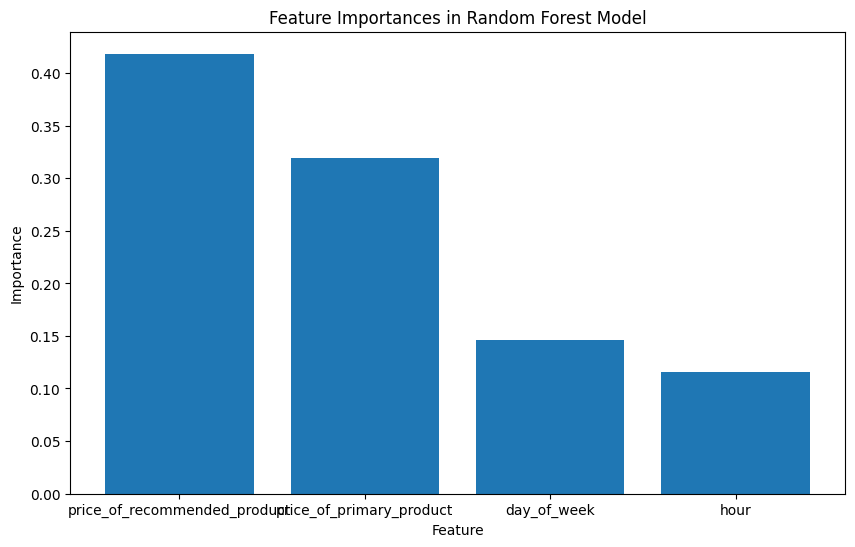

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for the feature importances for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [ ]:

# Random Forest Model Evaluation
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1-Score: {f1_rf}')
print(f'Random Forest ROC-AUC: {roc_auc_rf}')

NameError: name 'precision_score' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params_rf = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

print(f"Best Random Forest Parameters: {best_params_rf}")

# Train the final model with best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')

# Cross-validation score
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_rf}')
print(f'Average cross-validation score: {np.mean(cv_scores_rf)}')

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8403071017274473
Confusion Matrix:
[[4512  754]
 [ 910 4244]]
Cross-validation scores: [0.80662188 0.82888676 0.80211132 0.8120741  0.80929072]
Average cross-validation score: 0.8117969551787769


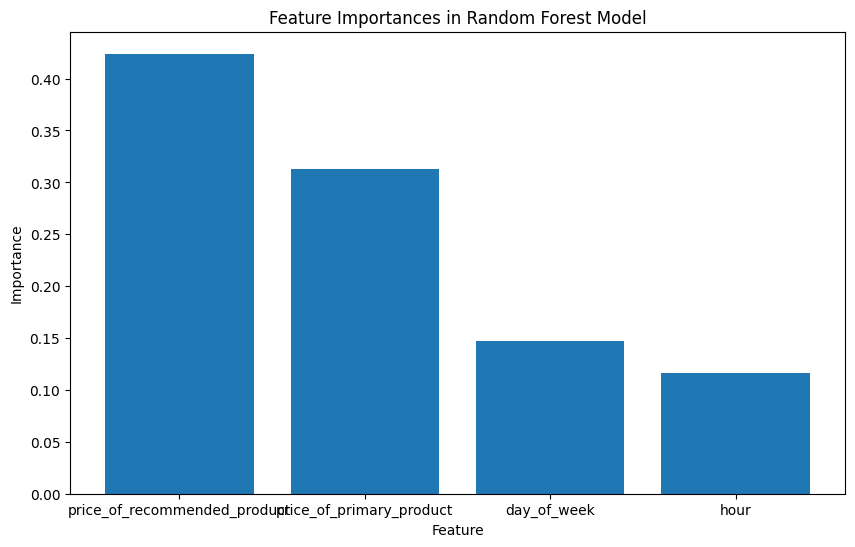

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for the feature importances for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()


In [ ]:
# Display the feature names
print("Feature names (X):")
print(X.columns)

# Display the first few rows of the features
print("\nFirst few rows of features (X):")
print(X.head())

# Display the target variable
print("\nTarget variable (y):")
print(y.head())


Feature names (X):
Index(['price_of_primary_product', 'price_of_recommended_product', 'hour', 'day_of_week'], dtype='object')

First few rows of features (X):
   price_of_primary_product  price_of_recommended_product  hour  day_of_week
0                    504.40                        385.90    17            4
1                     40.67                         40.67     9            4
2                    319.14                        319.14     5            1
3                     48.88                        105.28    16            1
4                     61.38                         40.93     5            1

Target variable (y):
0    1
1    1
2    1
3    1
4    1
Name: co_purchase, dtype: int64


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params_gb = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_

print(f"Best Gradient Boosting Parameters: {best_params_gb}")

# Train the final model with best parameters
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')

# Cross-validation score
cv_scores_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_gb}')
print(f'Average cross-validation score: {np.mean(cv_scores_gb)}')


Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8460652591170825
Confusion Matrix:
[[4491  775]
 [ 829 4325]]
Cross-validation scores: [0.82092131 0.84136276 0.82360845 0.83270947 0.83165371]
Average cross-validation score: 0.8300511394084961


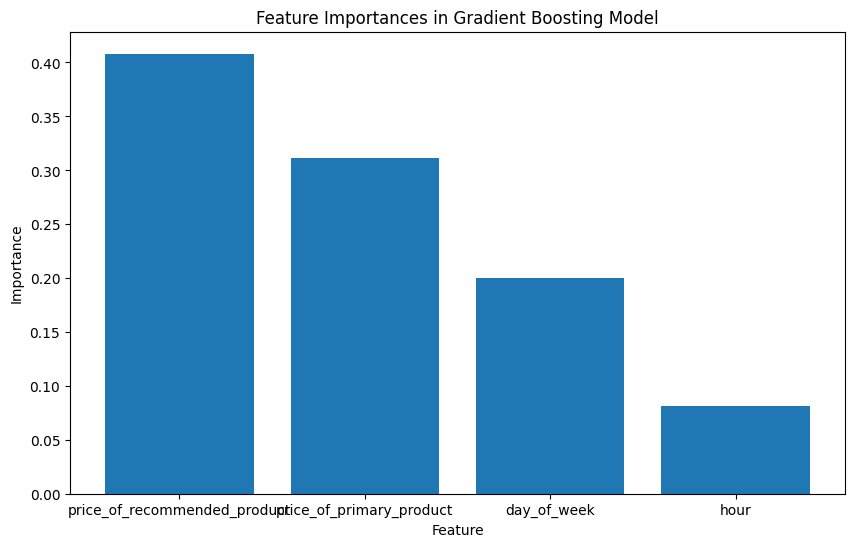

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best Gradient Boosting model
feature_importances_gb = best_gb_model.feature_importances_

# Create a DataFrame for the feature importances for better visualization
features_df_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_gb
})

# Sort the DataFrame by feature importance
features_df_gb = features_df_gb.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df_gb['Feature'], features_df_gb['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.show()

In [ ]:
# Gradient Boosting Model Evaluation
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting Confusion Matrix:\n{conf_matrix_gb}')
print(f'Gradient Boosting Precision: {precision_gb}')
print(f'Gradient Boosting Recall: {recall_gb}')
print(f'Gradient Boosting F1-Score: {f1_gb}')
print(f'Gradient Boosting ROC-AUC: {roc_auc_gb}')

Gradient Boosting Accuracy: 0.8460652591170825
Gradient Boosting Confusion Matrix:
[[4491  775]
 [ 829 4325]]
Gradient Boosting Precision: 0.8480392156862745
Gradient Boosting Recall: 0.8391540551028327
Gradient Boosting F1-Score: 0.8435732397113321
Gradient Boosting ROC-AUC: 0.8459917635939533


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create Neural Network model
nn_model = MLPClassifier(max_iter=500, random_state=42)

# Perform grid search with cross-validation
nn_grid_search = GridSearchCV(estimator=nn_model, param_grid=nn_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params_nn = nn_grid_search.best_params_
best_nn_model = nn_grid_search.best_estimator_

print(f"Best Neural Network Parameters: {best_params_nn}")

# Train the final model with best parameters
best_nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = best_nn_model.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print(f'Accuracy: {accuracy_nn}')
print(f'Confusion Matrix:\n{conf_matrix_nn}')

# Cross-validation score
cv_scores_nn = cross_val_score(best_nn_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_nn}')
print(f'Average cross-validation score: {np.mean(cv_scores_nn)}')


Best Neural Network Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.7894433781190019
Confusion Matrix:
[[4514  752]
 [1442 3712]]
Cross-validation scores: [0.76871401 0.80115163 0.7537428  0.79403014 0.78644784]
Average cross-validation score: 0.7808172836463135


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

# Print evaluation metrics
print(f'Neural Network Accuracy: {accuracy_nn}')
print(f'Neural Network Confusion Matrix:\n{conf_matrix_nn}')
print(f'Neural Network Precision: {precision_nn}')
print(f'Neural Network Recall: {recall_nn}')
print(f'Neural Network F1-Score: {f1_nn}')
print(f'Neural Network ROC-AUC: {roc_auc_nn}')


Neural Network Accuracy: 0.7894433781190019
Neural Network Confusion Matrix:
[[4514  752]
 [1442 3712]]
Neural Network Precision: 0.8315412186379928
Neural Network Recall: 0.7202173069460613
Neural Network F1-Score: 0.7718860469952173
Neural Network ROC-AUC: 0.7887072102523699


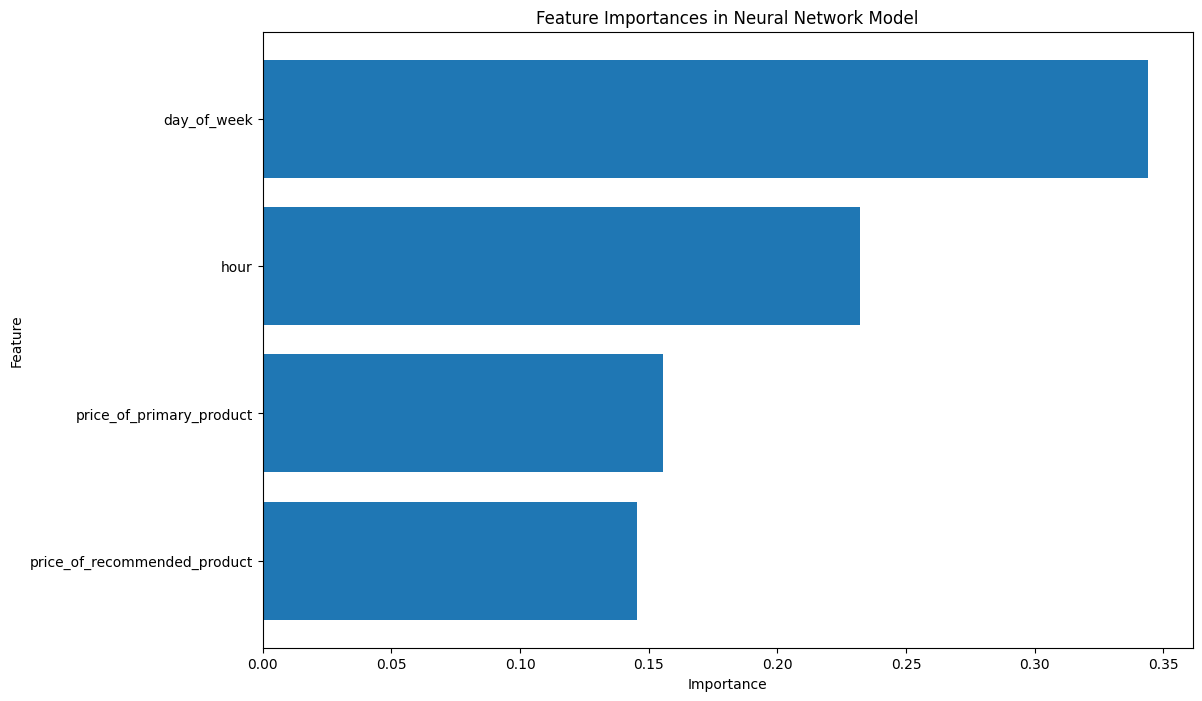

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the absolute values of the weights of the input layer
input_layer_weights = np.abs(best_nn_model.coefs_[0])

# Calculate the average importance of each feature by taking the mean of the absolute weights for each input neuron
feature_importances = np.mean(input_layer_weights, axis=1)

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Neural Network Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [ ]:


# Save the Gradient Boosting model
joblib.dump(best_gb_model, 'best_gb_model.pkl')


NameError: name 'best_gb_model' is not defined

In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [ ]:
import pandas as pd
import joblib

# Load the model
best_rf_model = joblib.load('best_rf_model.pkl')

# Sample data to predict (ensure your data is in the correct format)
data = {'price_of_primary_product': [100, 200],
        'price_of_recommended_product': [150, 250],
        'hour': [12, 14],
        'day_of_week': [2, 3]}
input_data = pd.DataFrame(data)

# Make predictions
predictions = best_rf_model.predict(input_data)

# Output the predictions
print(predictions)


[1 1]


In [ ]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: /content


In [ ]:
import os

files = os.listdir()
print("Files in the Current Directory:", files)


Files in the Current Directory: ['.config', 'drive', 'best_rf_model.pkl', 'best_gb_model.pkl', 'sample_data']


In [ ]:
from google.colab import files

# Download the Random Forest model file
files.download('best_rf_model.pkl')

# Download the Gradient Boosting model file
files.download('best_gb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
  # Download the Random Forest model file
files.download('best_rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import joblib

# Assuming your Random Forest model is already trained and saved
# Load the Random Forest model
best_rf_model = joblib.load('best_rf_model.pkl')

# Assuming you have your dataset 'X' on which you want to make predictions
# Make predictions using the Random Forest model
predictions = best_rf_model.predict(X)

# Create a DataFrame to hold the input features and predictions
results_df = X.copy()
results_df['predicted_co_purchase'] = predictions

# Save the DataFrame to a CSV file
results_df.to_csv('rf_predictions.csv', index=False)

# Verify the content of the CSV file
print("CSV file saved. Here's a preview:")
print(results_df.head())


CSV file saved. Here's a preview:
   price_of_primary_product  price_of_recommended_product  hour  day_of_week  predicted_co_purchase
0                    504.40                        385.90    17            4                      1
1                     40.67                         40.67     9            4                      1
2                    319.14                        319.14     5            1                      1
3                     48.88                        105.28    16            1                      1
4                     61.38                         40.93     5            1                      1


In [ ]:
from google.colab import files

# Download the CSV file
files.download('rf_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>